In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv("User_Data.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [8]:
df.shape

(400, 5)

**Checking the Null Values**

In [9]:
df.isnull().sum()#Hera, there are no null values present in the dataset

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

**Null Values Percetage**

In [10]:
df.isnull().sum()/len(df) #percentange to calculate the null values

User ID            0.0
Gender             0.0
Age                0.0
EstimatedSalary    0.0
Purchased          0.0
dtype: float64

<Axes: xlabel='Age'>

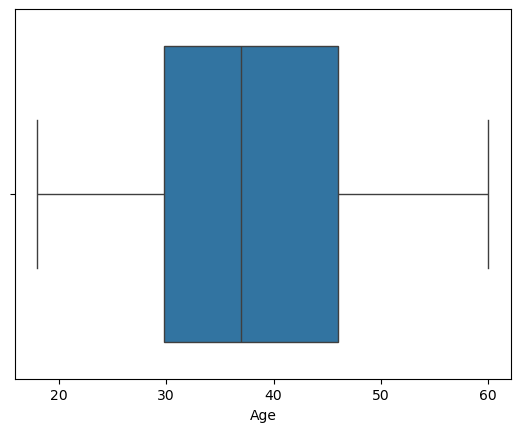

In [11]:
sns.boxplot(df['Age'],orient='h')

**we can drop user_id columns its not required**

In [12]:
df.drop("User ID",axis=1,inplace=True)

In [13]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [14]:
df.value_counts()

Gender  Age  EstimatedSalary  Purchased
Female  41   72000            0            3
Male    40   57000            0            3
        42   65000            0            2
             54000            0            2
        35   75000            0            2
                                          ..
Female  42   90000            1            1
             80000            1            1
             79000            0            1
             75000            0            1
Male    60   102000           1            1
Name: count, Length: 380, dtype: int64

In [15]:
df.columns

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

<Axes: xlabel='EstimatedSalary'>

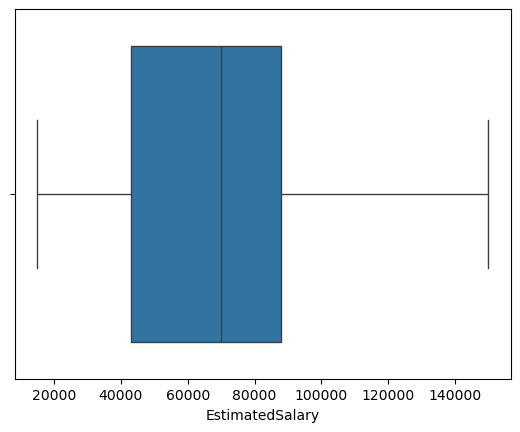

In [16]:
sns.boxplot(df['EstimatedSalary'],orient='h')

In [17]:
df['Gender'].value_counts()

Gender
Female    204
Male      196
Name: count, dtype: int64

In [18]:
from sklearn.preprocessing import OneHotEncoder
onc= OneHotEncoder()

In [19]:
cater=df.select_dtypes(include='object').columns
cater

Index(['Gender'], dtype='object')

In [20]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [21]:
numerical_col=df.select_dtypes(exclude='object')
numerical_col.drop('User ID',axis=1)

KeyError: "['User ID'] not found in axis"

In [24]:
numerical_col.corr()

,Age,EstimatedSalary,Purchased
Age,1.000000,0.155238,0.622454
EstimatedSalary,0.155238,1.000000,0.362083
Purchased,0.622454,0.362083,1.000000


In [25]:
# df.corr()

In [26]:
# df=pd.get_dummies(df,columns=['Gender'],dtype='int')

In [27]:
df.drop('User ID',axis=1,inplace=True)

KeyError: "['User ID'] not found in axis"

In [28]:
df

,Gender,Age,EstimatedSalary,Purchased
0,Male,19,19000,0
1,Male,35,20000,0
2,Female,26,43000,0
3,Female,27,57000,0
4,Male,19,76000,0
...,...,...,...,...
395,Female,46,41000,1
396,Male,51,23000,1
397,Female,50,20000,1
398,Male,36,33000,0


In [29]:
df=pd.get_dummies(df,columns=['Gender'],dtype='int')

In [30]:
df

,Age,EstimatedSalary,Purchased,Gender_Female,Gender_Male
0,19,19000,0,0,1
1,35,20000,0,0,1
2,26,43000,0,1,0
3,27,57000,0,1,0
4,19,76000,0,0,1
...,...,...,...,...,...
395,46,41000,1,1,0
396,51,23000,1,0,1
397,50,20000,1,1,0
398,36,33000,0,0,1


In [31]:
X=df.drop('Purchased',axis=1)
X

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


In [32]:
y=df['Purchased']
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.25, random_state=42)

In [34]:
X_train.shape

(300, 4)

In [35]:
X_test.shape

(100, 4)

In [36]:
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [37]:
y_pred= classifier.predict(X_test)  
y_pred

array([0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [38]:
from sklearn.metrics import confusion_matrix  
# cm= confusion_matrix()  

In [39]:
score = classifier.score(X_test, y_test)
print('Test Accuracy Score', score*100,'%')

Test Accuracy Score 88.0 %


In [40]:
confusion_matrix(y_test,y_pred)

array([[61,  2],
       [10, 27]])

In [41]:
classifier.predict([[123,7522,0,1]])

array([1])

In [42]:
from sklearn.neighbors import KNeighborsClassifier  


In [43]:
model= KNeighborsClassifier(n_neighbors=5, metric='euclidean', p=2 )
model.fit(X_train, y_train)  


KNeighborsClassifier(metric='euclidean')

In [44]:
score = model.score(X_test, y_test)
print('Test Accuracy Score', score*100,'%')

Test Accuracy Score 82.0 %


In [45]:
from sklearn.tree import DecisionTreeClassifier  
model_tree= DecisionTreeClassifier(criterion='entropy', random_state=42)  
model_tree.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [46]:
score = model_tree.score(X_test, y_test)
print('Test Accuracy Score', score*100,'%')

Test Accuracy Score 87.0 %


In [51]:
from sklearn.naive_bayes import GaussianNB  
naive_model= GaussianNB()  
naive_model.fit(X_train, y_train)  

GaussianNB()

In [52]:
score = naive_model.score(X_test, y_test)
print('Test Accuracy Score', score*100,'%')

Test Accuracy Score 93.0 %


In [53]:
naive_model.predict([[47,7522,0,1],[45,52000,1,0]])# naive bayes model gives best accuracy compared to others 

array([1, 0])

In [54]:
import os
try:
    directory= os.getcwd()
    folder_name='model'
    path=os.path.join(directory,folder_name)
    os.makedirs(path) 
except Exception as e:
    print(e)

[Errno 17] File exists: '/Users/adityapnv/Documents/AD_userreview/model'


In [57]:
import pickle
pickle.dump(naive_model,open(f'{path}/user_pred.pkl','wb'))

In [58]:
path

'/Users/adityapnv/Documents/AD_userreview/model'